In [ ]:
import os
import sys
sys.path.append('../thermodynamic-interpolation')

import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")
sns.set_palette(sns.color_palette("Dark2", n_colors=10), n_colors=10)
palette = sns.color_palette()
matplotlib.rcParams.update({'font.size': 15})
cmap = 'crest_r'

import warnings
warnings.filterwarnings("ignore")

In [ ]:
T0 = 1000
T1 = 400

results_save_path = f"../paper_results/10506/ambient_md/10506_1000to400K"  # edit here

torsions_md_T0 = np.load(f"{results_save_path}/torsions_md_0.npy")
torsions_md_T1 = np.load(f"{results_save_path}/torsions_md_1.npy")

torsions_md_ti_T0 = np.load(f"{results_save_path}/torsions_md_ti_0.npy")
torsions_md_ti_T1 = np.load(f"{results_save_path}/torsions_md_ti_1.npy")

bond_lengths_md_T0 = np.load(f"{results_save_path}/bond_lengths_md_0.npy")
bond_lengths_md_T1 = np.load(f"{results_save_path}/bond_lengths_md_1.npy")

bond_lengths_md_ti_T0 = np.load(f"{results_save_path}/bond_lengths_md_ti_0.npy")
bond_lengths_md_ti_T1 = np.load(f"{results_save_path}/bond_lengths_md_ti_1.npy")

bond_angles_md_T0 = np.load(f"{results_save_path}/bond_angles_md_0.npy")
bond_angles_md_T1 = np.load(f"{results_save_path}/bond_angles_md_1.npy")

bond_angles_md_ti_T0 = np.load(f"{results_save_path}/bond_angles_md_ti_0.npy")
bond_angles_md_ti_T1 = np.load(f"{results_save_path}/bond_angles_md_ti_1.npy")

torsions_h5_md = np.load(f"{results_save_path}/torsions_h5_md.npy")


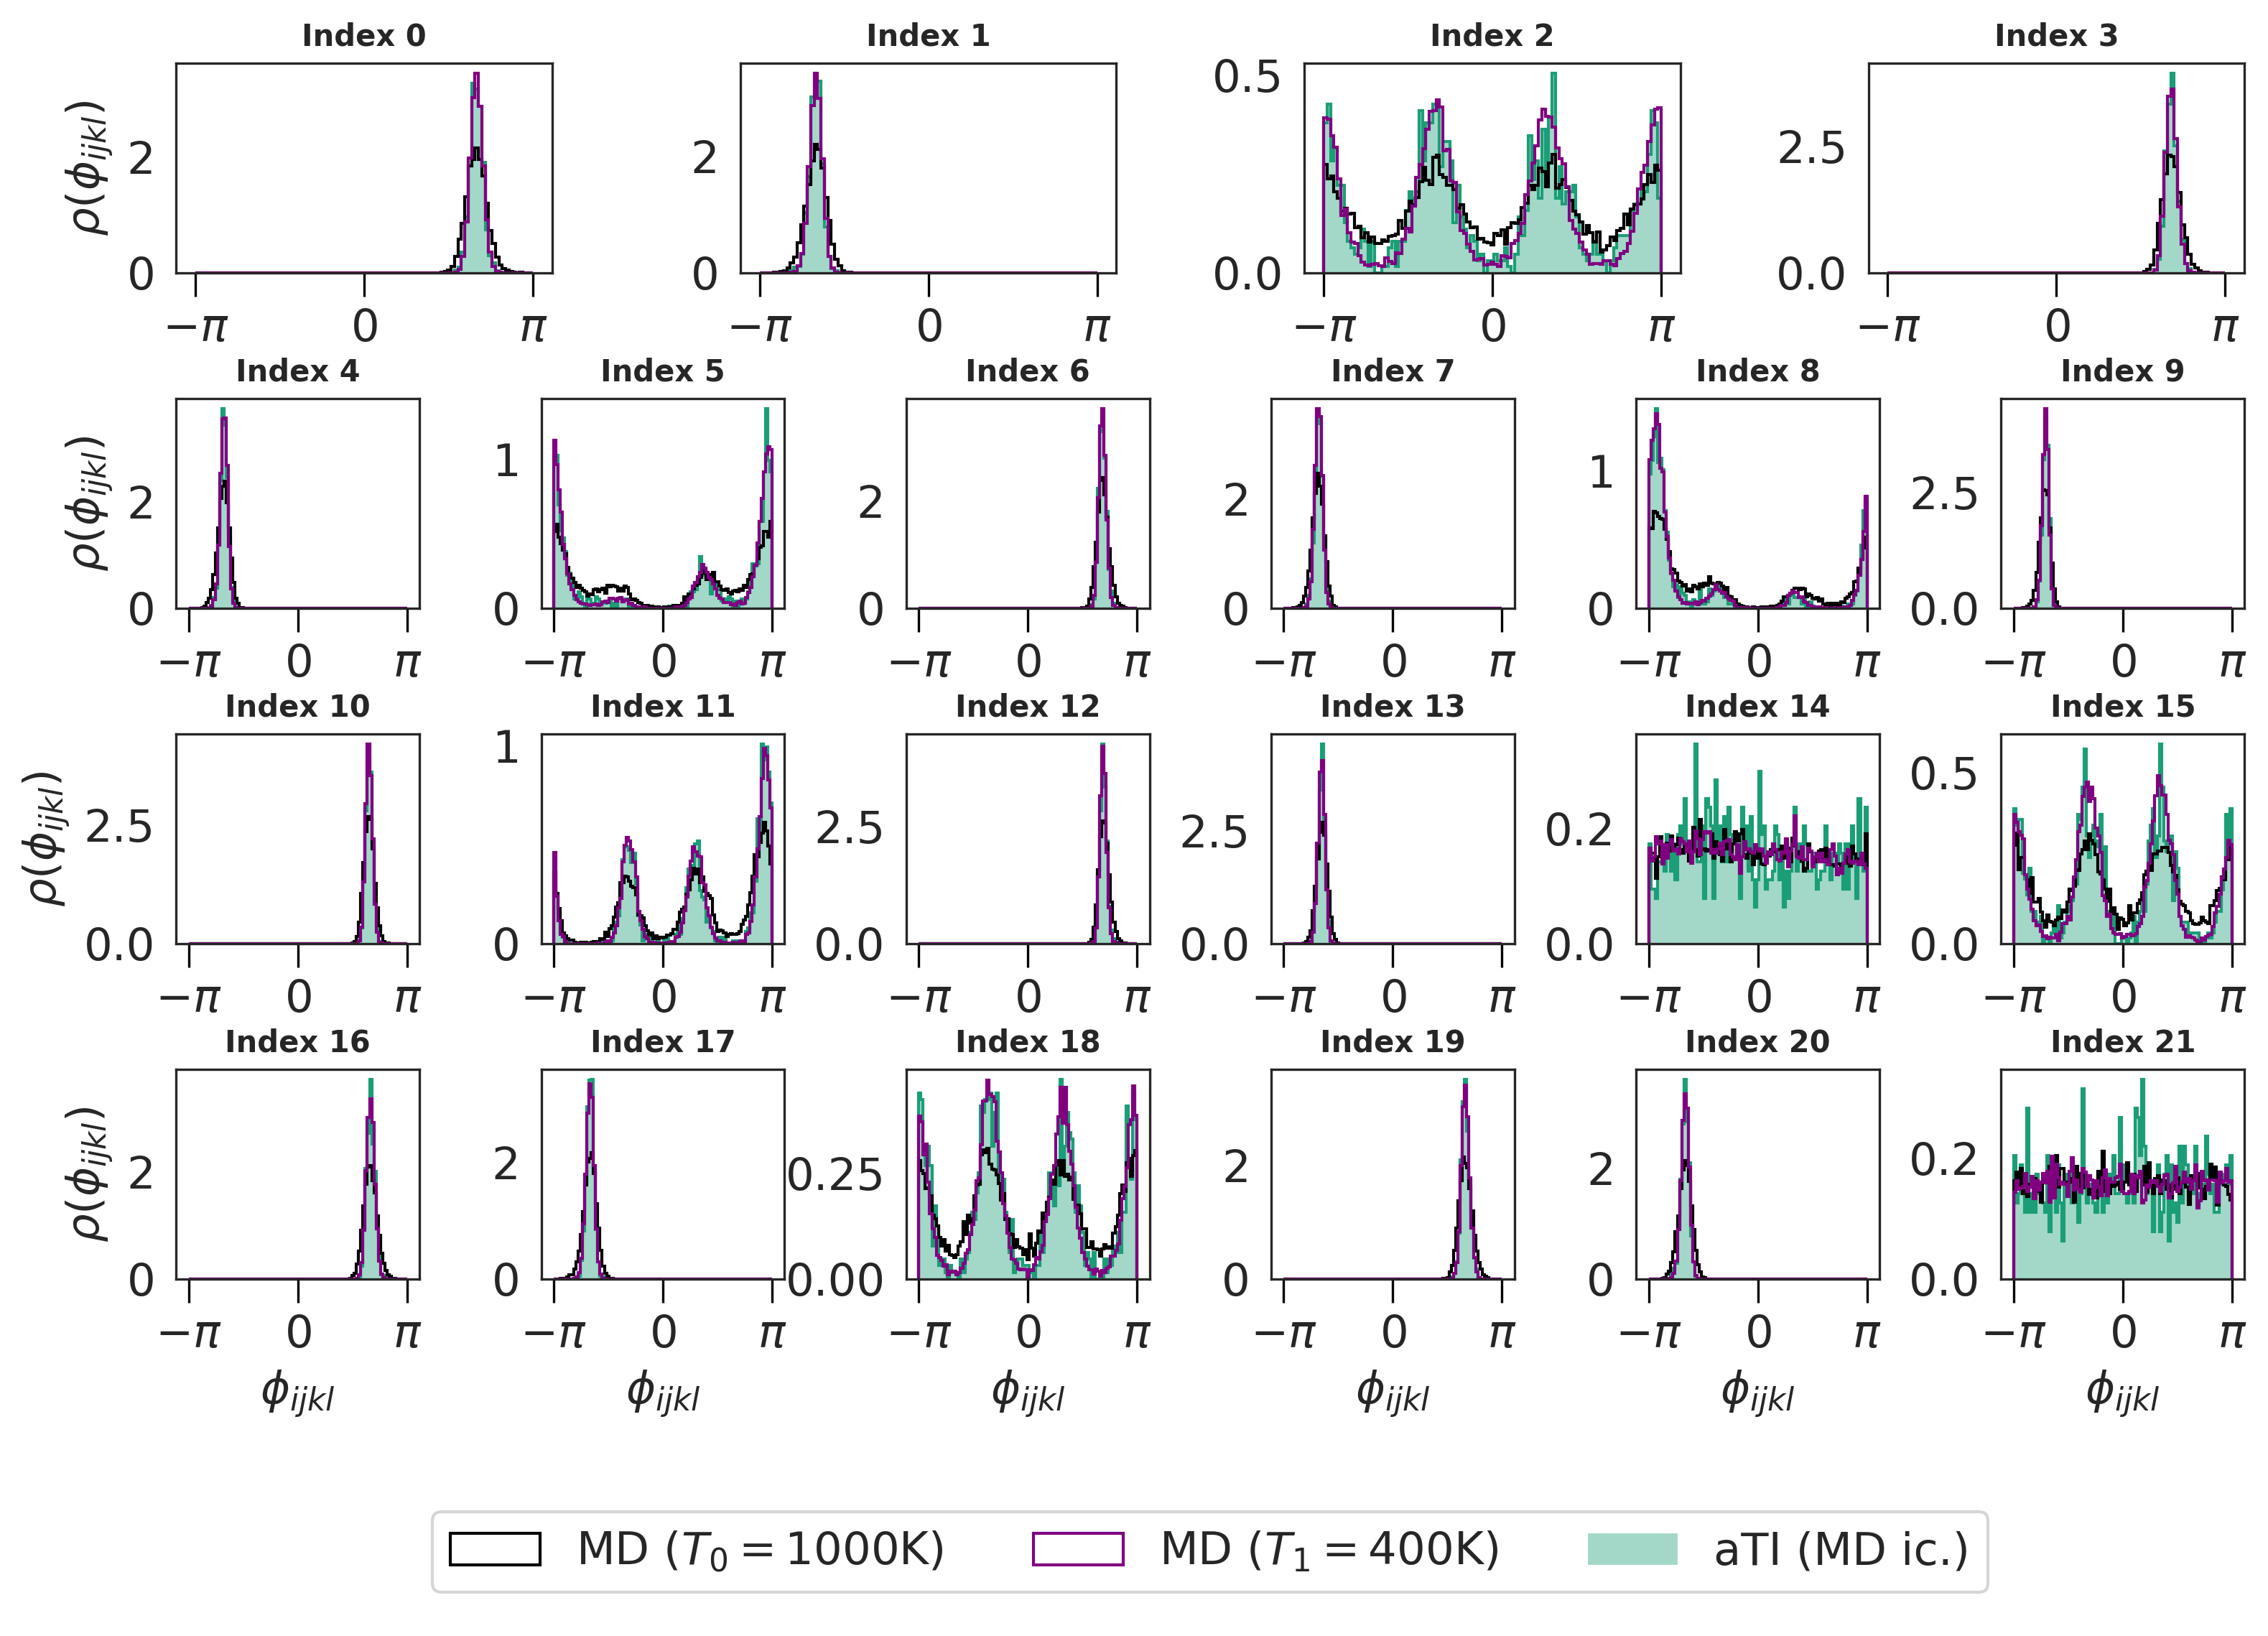

In [ ]:
fig = plt.figure(figsize=(12, 8), dpi=300, subplotpars=matplotlib.figure.SubplotParams(left=0.1, right=0.9, top=0.9, bottom=0.0, wspace=0.5, hspace=0.5))
gs = fig.add_gridspec(5, 1, hspace=0.6)
gs_nested1 = gs[0].subgridspec(1, 4, width_ratios=[1]*4)
gs_nested2 = gs[1].subgridspec(1, 6, width_ratios=[1]*6)
gs_nested3 = gs[2].subgridspec(1, 6, width_ratios=[1]*6)
gs_nested4 = gs[3].subgridspec(1, 6, width_ratios=[1]*6)
gs_nested5 = gs[4].subgridspec(1, 1, height_ratios=[0.1]*1)


axs = [None]*(len(torsions_md_ti_T1[0])+1)

# fill each nested grid
axs[0] = fig.add_subplot(gs_nested1[0])
axs[1] = fig.add_subplot(gs_nested1[1])
axs[2] = fig.add_subplot(gs_nested1[2])
axs[3] = fig.add_subplot(gs_nested1[3])


axs[4] = fig.add_subplot(gs_nested2[0])
axs[5] = fig.add_subplot(gs_nested2[1])
axs[6] = fig.add_subplot(gs_nested2[2])
axs[7] = fig.add_subplot(gs_nested2[3])
axs[8] = fig.add_subplot(gs_nested2[4])
axs[9] = fig.add_subplot(gs_nested2[5])

axs[10] = fig.add_subplot(gs_nested3[0])
axs[11] = fig.add_subplot(gs_nested3[1])
axs[12] = fig.add_subplot(gs_nested3[2])
axs[13] = fig.add_subplot(gs_nested3[3])
axs[14] = fig.add_subplot(gs_nested3[4])
axs[15] = fig.add_subplot(gs_nested3[5])

axs[16] = fig.add_subplot(gs_nested4[0])
axs[17] = fig.add_subplot(gs_nested4[1])
axs[18] = fig.add_subplot(gs_nested4[2])
axs[19] = fig.add_subplot(gs_nested4[3])
axs[20] = fig.add_subplot(gs_nested4[4])
axs[21] = fig.add_subplot(gs_nested4[5])

axs[22] = fig.add_subplot(gs_nested5[0])
axs[22].axis('off')

# fig, axs = plt.subplots(3, 7, figsize=(12, 8), dpi=300)
# axs = axs.flatten()

for i in range(len(torsions_md_ti_T1[0])):
    bins = np.linspace(-np.pi, np.pi, 100)

    # MD/TI torsions
    axs[i].hist(torsions_md_ti_T1[:, i], bins=bins, histtype="stepfilled", alpha=0.4, color=palette[0], density=True, label="aTI (MD ic.)", linewidth=0.1)
    axs[i].hist(torsions_md_ti_T1[:, i], bins=bins, histtype="step", color=palette[0], density=True, linewidth=1)
    axs[i].hist(torsions_md_T0[:, i], bins=bins, histtype="step", color='k', density=True, label=rf"MD $(T_0={T0}\mathrm{{K}})$", linewidth=1, linestyle='-')
    axs[i].hist(torsions_md_T1[:, i], bins=bins, histtype="step", color='purple', density=True, label=rf"MD ($T_1={T1}\mathrm{{K}}$)", linewidth=1)

    axs[i].set_xticklabels([r"$-\pi$", r"$0$", r"$\pi$"])
    axs[i].set_xticks([-np.pi, 0, np.pi])
    axs[i].set_xlim([-3.5, 3.5])
    axs[i].tick_params(bottom=True, top=False, axis='x', color='k', length=8, grid_color='none')

    if i in {0, 4, 10, 16}:
        axs[i].set_ylabel(r"$\rho(\phi_{ijkl})$")

    if i in {16, 17, 18, 19, 20, 21}:
        axs[i].set_xlabel(r"$\phi_{ijkl}$")

    axs[i].set_title(f"Index {i}", fontsize=10, weight='bold')

    lines_labels = [axs[i].get_legend_handles_labels() for i in range(len(axs))]
    lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

    lines_labels = {label: line for line, label in zip(lines, labels)}
    labels = sorted(list(lines_labels.keys()))
    lines = [lines_labels[label] for label in labels]

fig.legend(lines, labels, loc="lower center", ncol=len(labels), bbox_to_anchor=(0.5, 0), fontsize=15)
# fig.suptitle("Torsion Distributions", fontsize=20, weight='bold')
plt.tight_layout(pad=0.2)
plt.savefig(f"{results_save_path}/torsions.pdf")

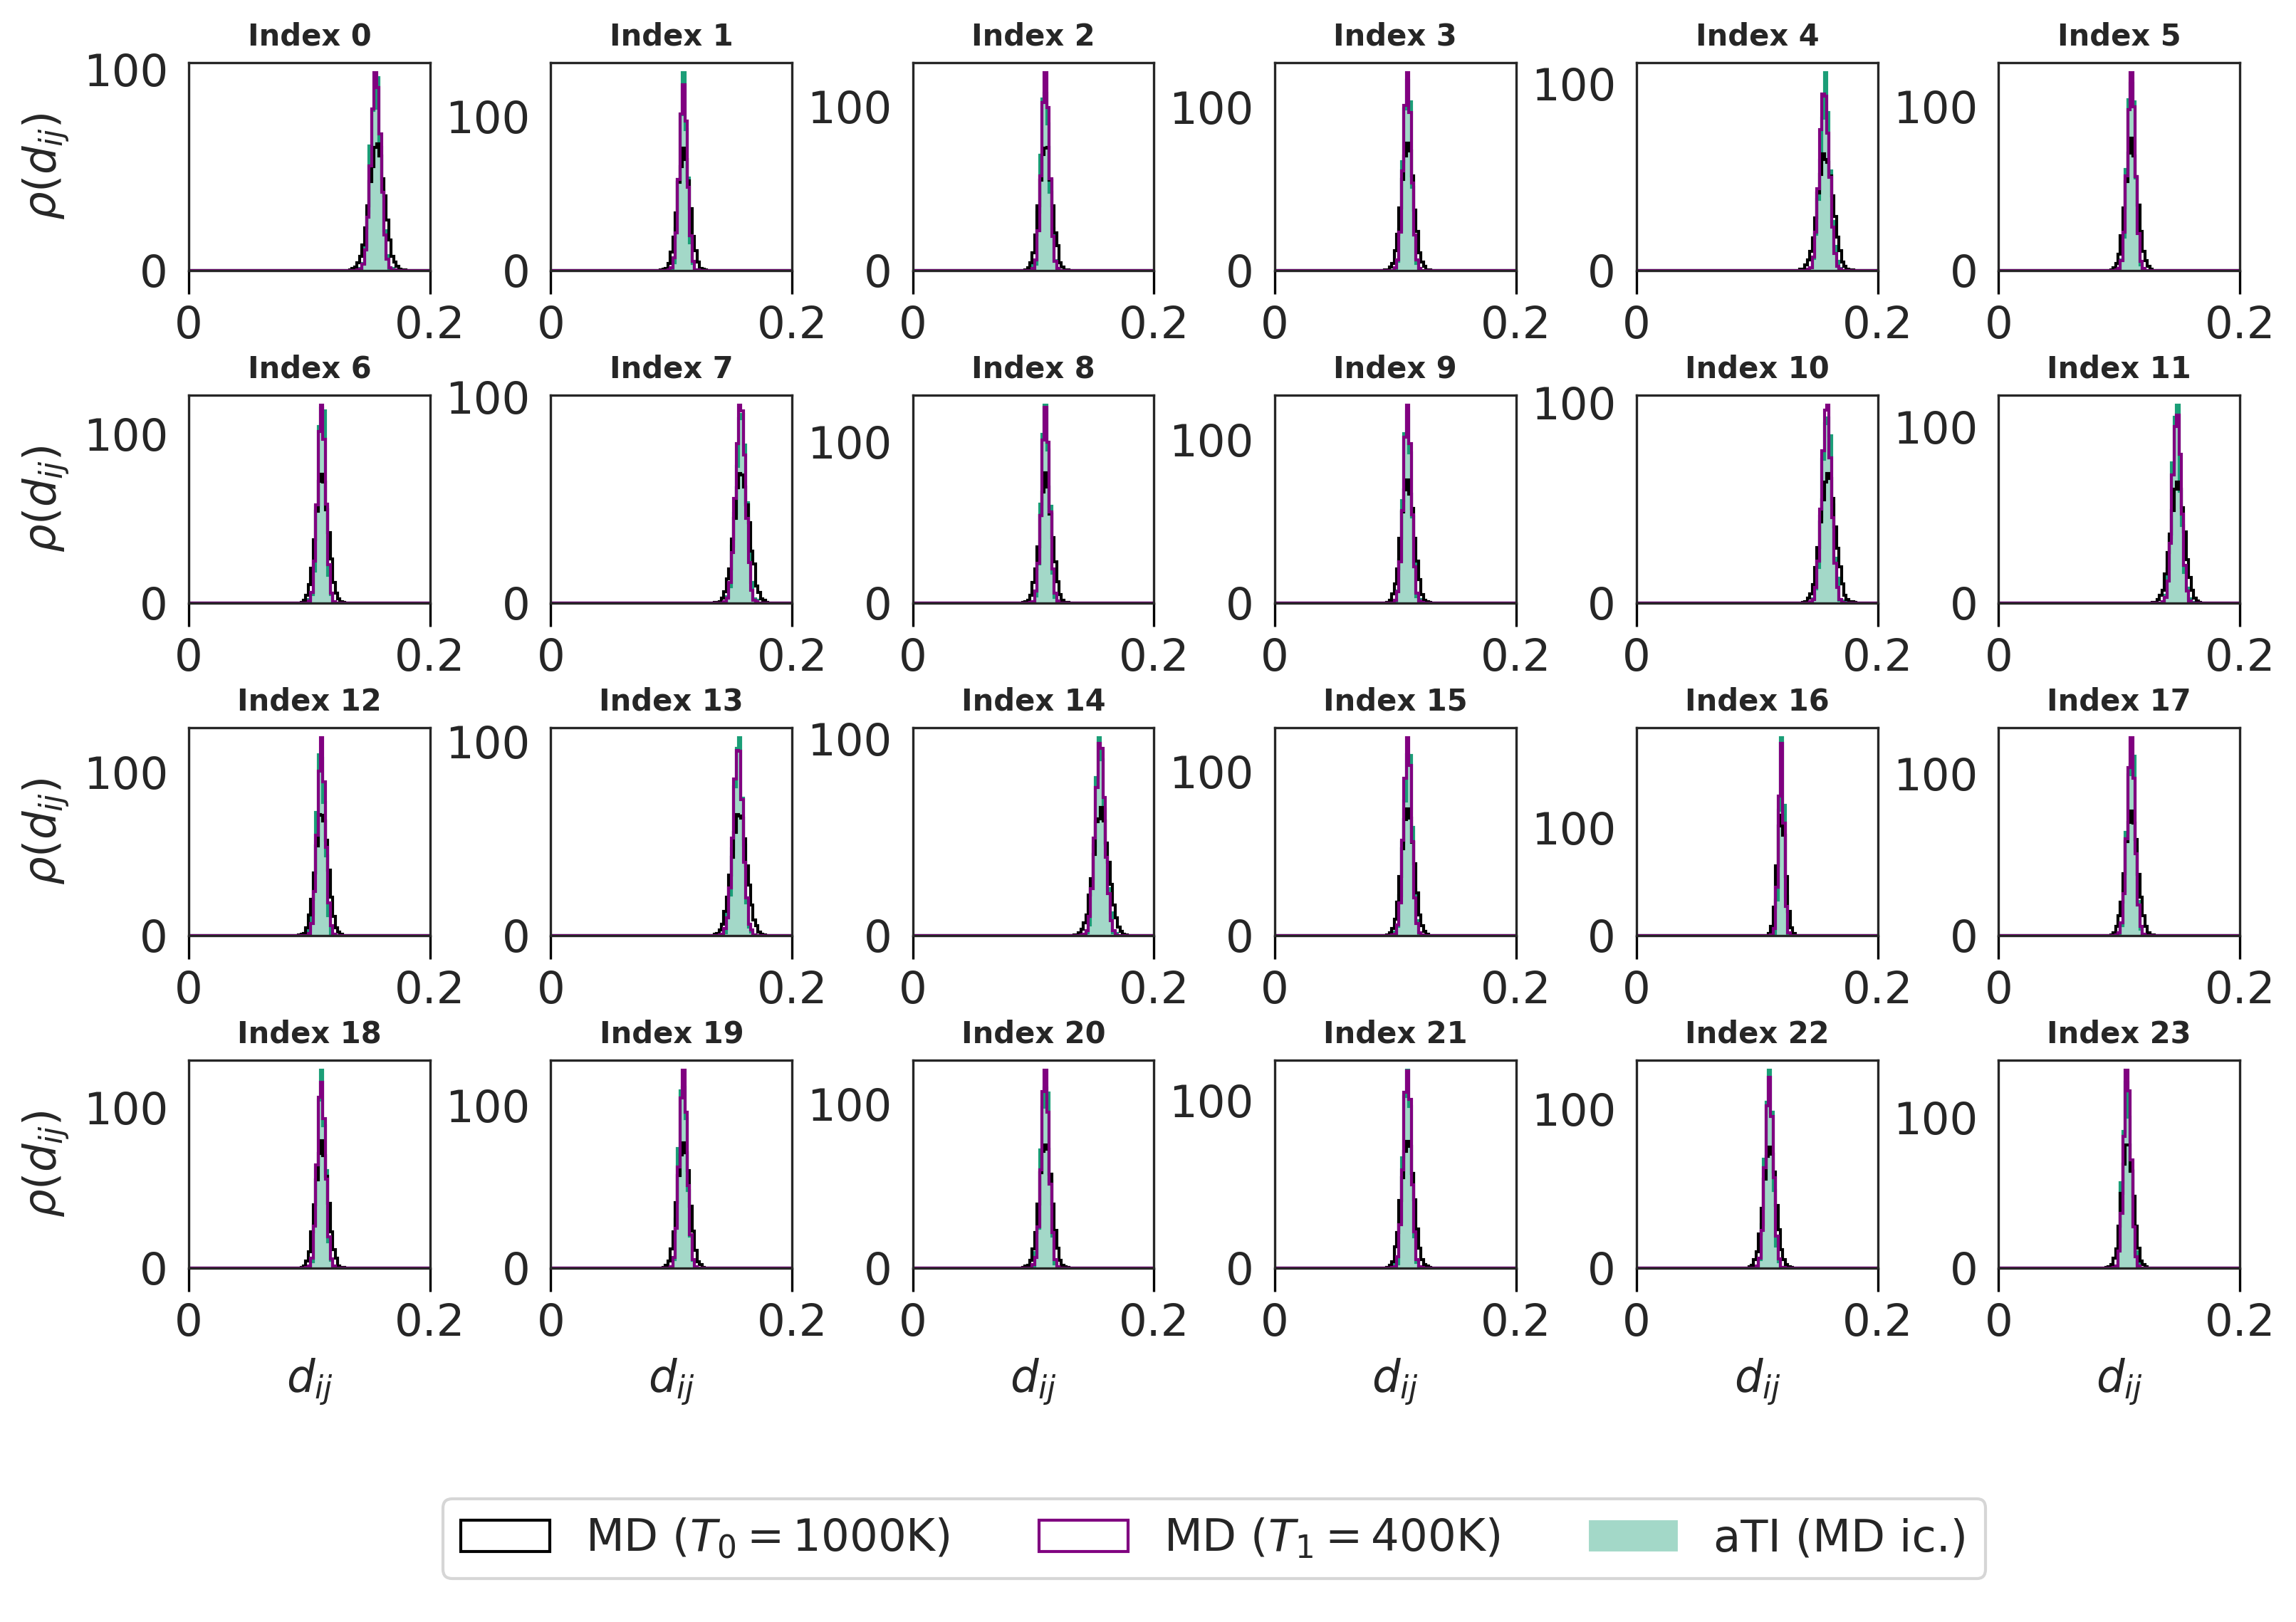

In [36]:
fig = plt.figure(figsize=(12, 8), dpi=300, subplotpars=matplotlib.figure.SubplotParams(left=0.1, right=0.9, top=0.9, bottom=0.0, wspace=0.5, hspace=0.5))
gs = fig.add_gridspec(5, 1, hspace=0.6)
gs_nested1 = gs[0].subgridspec(1, 6, width_ratios=[1]*6)
gs_nested2 = gs[1].subgridspec(1, 6, width_ratios=[1]*6)
gs_nested3 = gs[2].subgridspec(1, 6, width_ratios=[1]*6)
gs_nested4 = gs[3].subgridspec(1, 6, width_ratios=[1]*6)
gs_nested5 = gs[4].subgridspec(1, 1, height_ratios=[0.1]*1)


axs = [None]*(len(bond_lengths_md_ti_T1[0])+1)

# fill each nested grid
axs[0] = fig.add_subplot(gs_nested1[0])
axs[1] = fig.add_subplot(gs_nested1[1])
axs[2] = fig.add_subplot(gs_nested1[2])
axs[3] = fig.add_subplot(gs_nested1[3])
axs[4] = fig.add_subplot(gs_nested1[4])
axs[5] = fig.add_subplot(gs_nested1[5])

axs[6] = fig.add_subplot(gs_nested2[0])
axs[7] = fig.add_subplot(gs_nested2[1])
axs[8] = fig.add_subplot(gs_nested2[2])
axs[9] = fig.add_subplot(gs_nested2[3])
axs[10] = fig.add_subplot(gs_nested2[4])
axs[11] = fig.add_subplot(gs_nested2[5])

axs[12] = fig.add_subplot(gs_nested3[0])
axs[13] = fig.add_subplot(gs_nested3[1])
axs[14] = fig.add_subplot(gs_nested3[2])
axs[15] = fig.add_subplot(gs_nested3[3])
axs[16] = fig.add_subplot(gs_nested3[4])
axs[17] = fig.add_subplot(gs_nested3[5])

axs[18] = fig.add_subplot(gs_nested4[0])
axs[19] = fig.add_subplot(gs_nested4[1])
axs[20] = fig.add_subplot(gs_nested4[2])
axs[21] = fig.add_subplot(gs_nested4[3])
axs[22] = fig.add_subplot(gs_nested4[4])
axs[23] = fig.add_subplot(gs_nested4[5])

axs[24] = fig.add_subplot(gs_nested5[0])
axs[24].axis('off')


for i in range(len(bond_lengths_md_ti_T1[0])):
    bins = np.linspace(0, 0.2, 100)

    # MD/TI torsions
    axs[i].hist(bond_lengths_md_ti_T1[:, i], bins=bins, histtype="stepfilled", alpha=0.4, color=palette[0], density=True, label="aTI (MD ic.)", linewidth=0.1)
    axs[i].hist(bond_lengths_md_ti_T1[:, i], bins=bins, histtype="step", color=palette[0], density=True, linewidth=1)
    axs[i].hist(bond_lengths_md_T0[:, i], bins=bins, histtype="step", color='k', density=True, label=rf"MD $(T_0={T0}\mathrm{{K}})$", linewidth=1, linestyle='-')
    axs[i].hist(bond_lengths_md_T1[:, i], bins=bins, histtype="step", color='purple', density=True, label=rf"MD ($T_1={T1}\mathrm{{K}}$)", linewidth=1)

    axs[i].set_xticklabels([0, 0.2])
    axs[i].set_xticks([0, 0.2])
    axs[i].set_xlim([0, 0.2])
    axs[i].tick_params(bottom=True, top=False, axis='x', color='k', length=8, grid_color='none')

    if i in {0, 6, 12, 18}:
        axs[i].set_ylabel(r"$\rho(d_{ij})$")
    if i in {18, 19, 20, 21, 22, 23}:
        axs[i].set_xlabel(r"$d_{ij}$")

    axs[i].set_title(f"Index {i}", fontsize=10, weight='bold')

    lines_labels = [axs[i].get_legend_handles_labels() for i in range(len(axs))]
    lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

    lines_labels = {label: line for line, label in zip(lines, labels)}
    labels = sorted(list(lines_labels.keys()))
    lines = [lines_labels[label] for label in labels]

# fig.suptitle("Bond Length Distributions", fontsize=20, weight='bold')
fig.legend(lines, labels, loc="lower center", ncol=len(labels), bbox_to_anchor=(0.5, 0), fontsize=15)
plt.tight_layout(pad=0.2)
plt.savefig(f"{results_save_path}/bond_lengths.pdf")

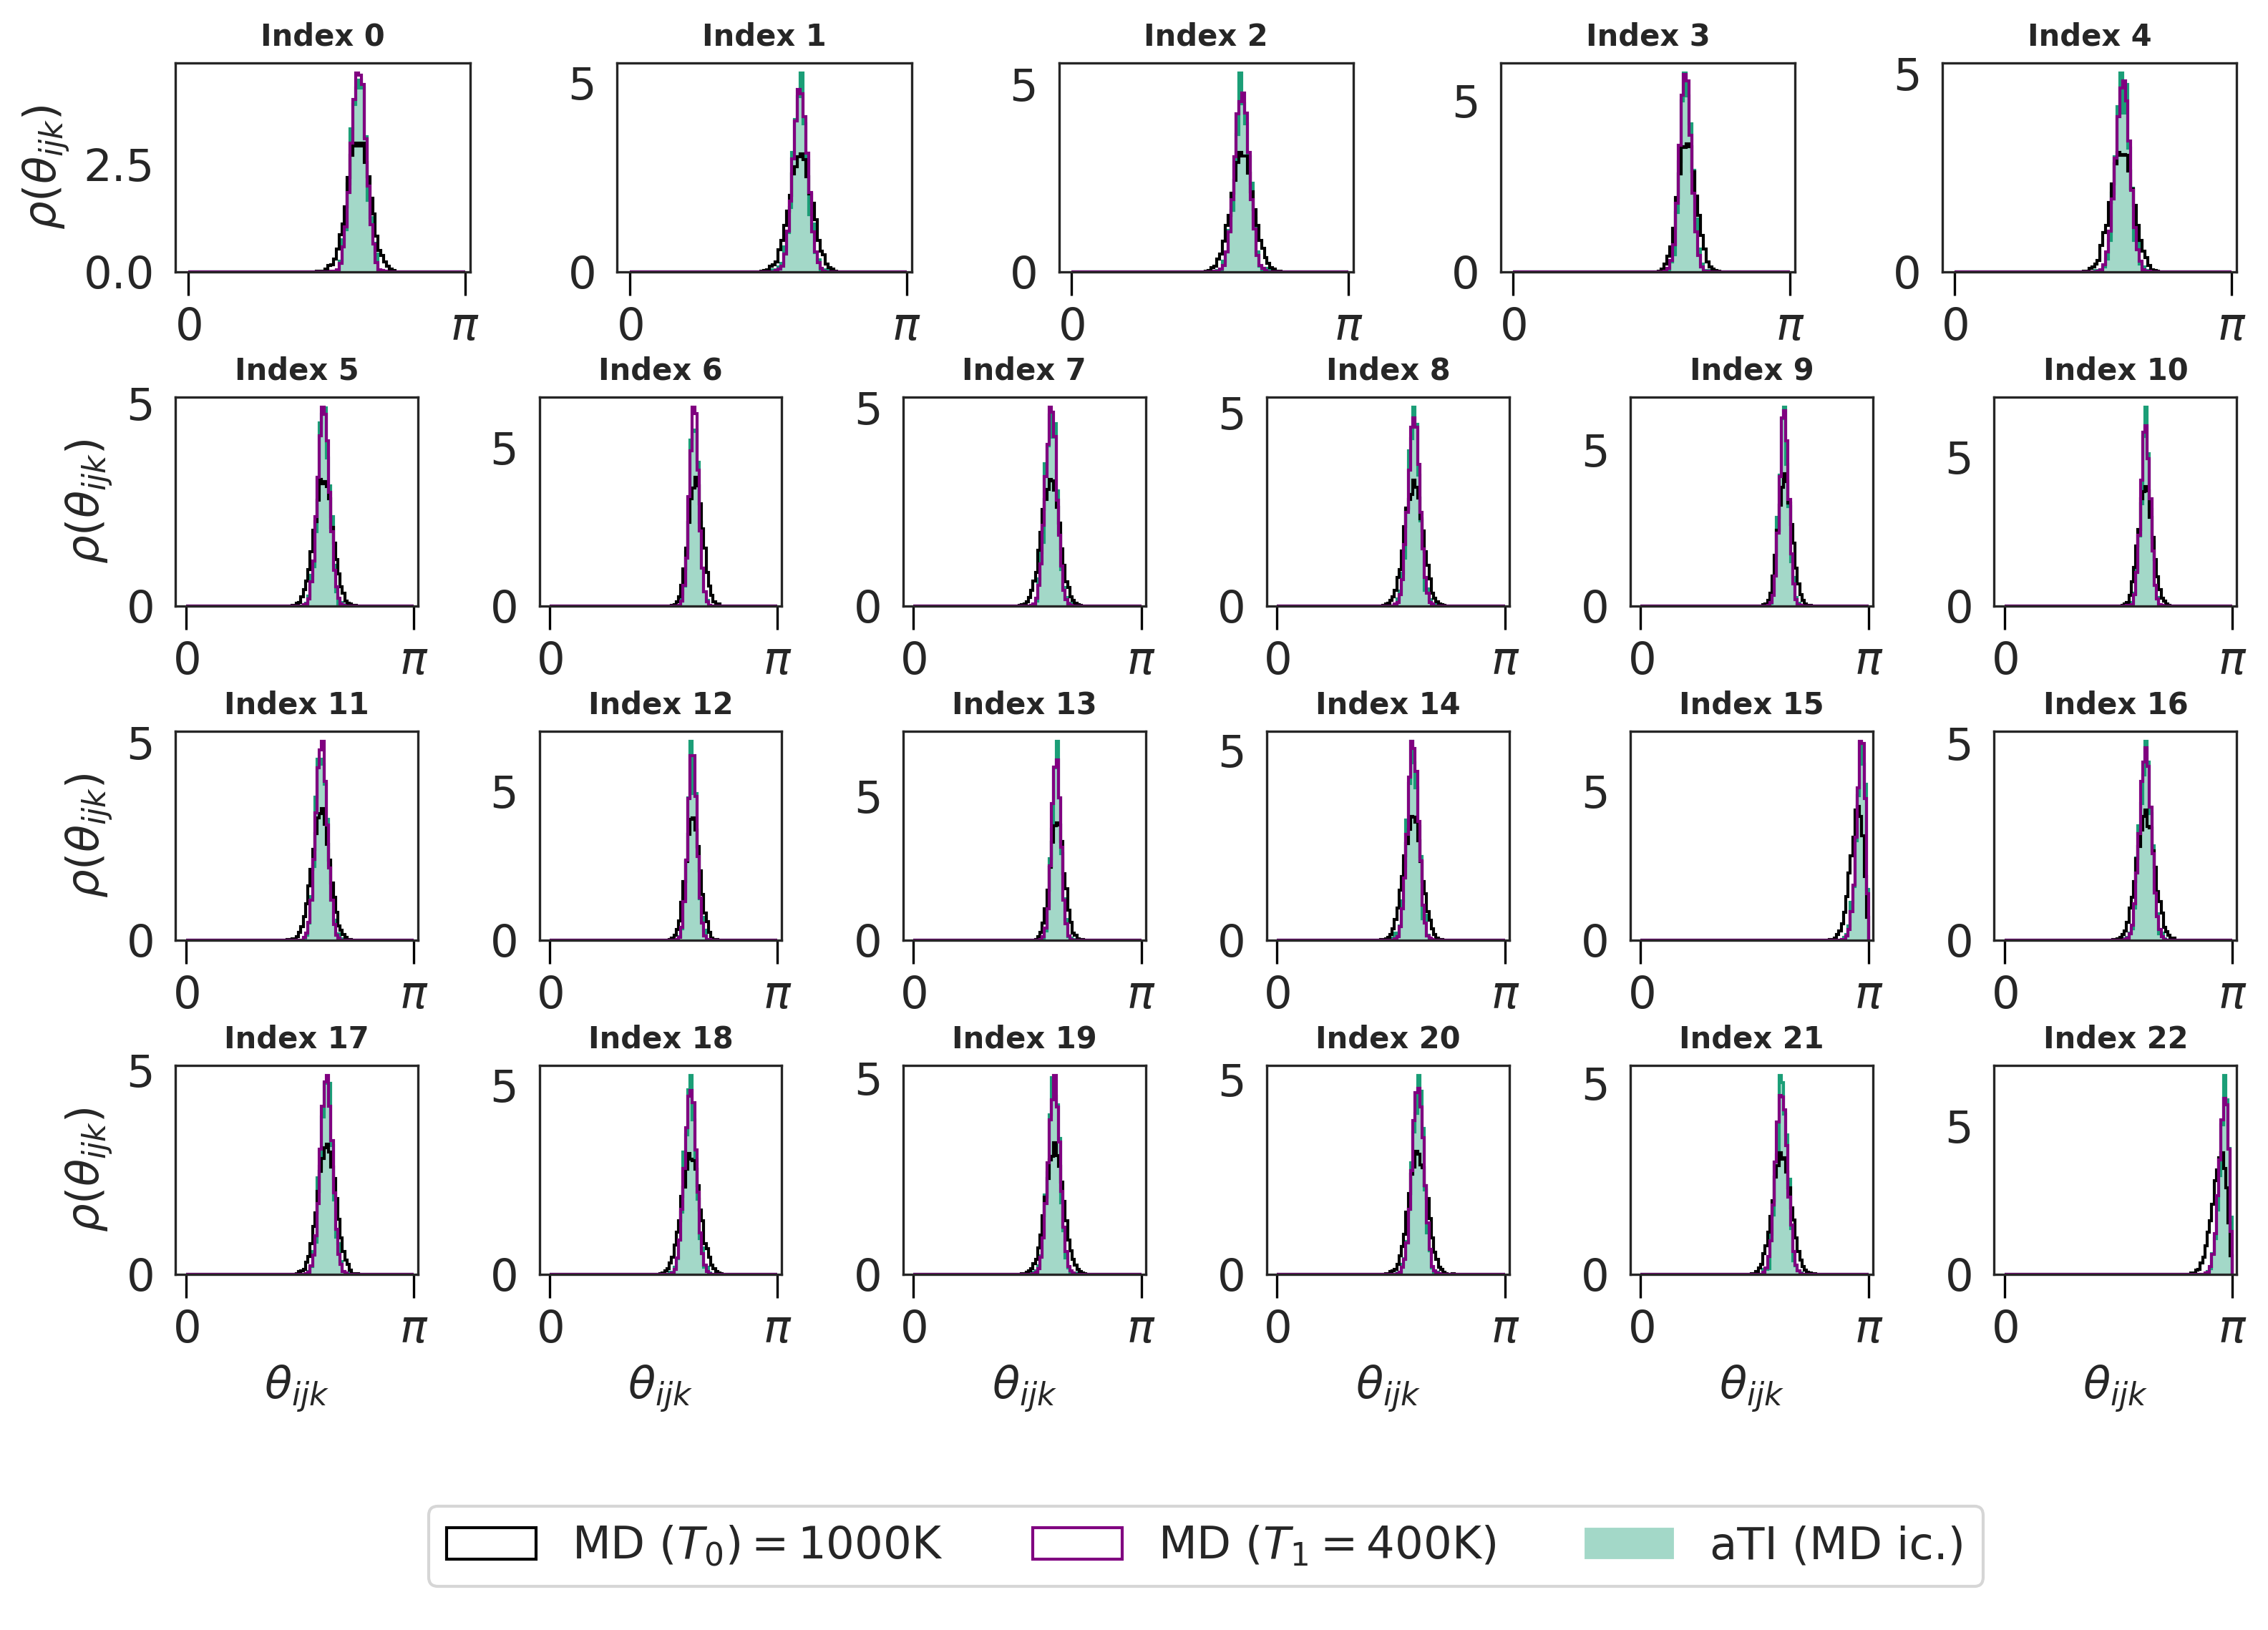

In [38]:
fig = plt.figure(figsize=(12, 8), dpi=300, subplotpars=matplotlib.figure.SubplotParams(left=0.1, right=0.9, top=0.9, bottom=0.0, wspace=0.5, hspace=0.5))
gs = fig.add_gridspec(5, 1, hspace=0.6)
gs_nested1 = gs[0].subgridspec(1, 5, width_ratios=[1]*5)
gs_nested2 = gs[1].subgridspec(1, 6, width_ratios=[1]*6)
gs_nested3 = gs[2].subgridspec(1, 6, width_ratios=[1]*6)
gs_nested4 = gs[3].subgridspec(1, 6, width_ratios=[1]*6)
gs_nested5 = gs[4].subgridspec(1, 1, height_ratios=[0.1]*1)


axs = [None]*(len(bond_angles_md_ti_T1[0])+1)

# fill each nested grid
axs[0] = fig.add_subplot(gs_nested1[0])
axs[1] = fig.add_subplot(gs_nested1[1])
axs[2] = fig.add_subplot(gs_nested1[2])
axs[3] = fig.add_subplot(gs_nested1[3])
axs[4] = fig.add_subplot(gs_nested1[4])


axs[5] = fig.add_subplot(gs_nested2[0])
axs[6] = fig.add_subplot(gs_nested2[1])
axs[7] = fig.add_subplot(gs_nested2[2])
axs[8] = fig.add_subplot(gs_nested2[3])
axs[9] = fig.add_subplot(gs_nested2[4])
axs[10] = fig.add_subplot(gs_nested2[5])

axs[11] = fig.add_subplot(gs_nested3[0])
axs[12] = fig.add_subplot(gs_nested3[1])
axs[13] = fig.add_subplot(gs_nested3[2])
axs[14] = fig.add_subplot(gs_nested3[3])
axs[15] = fig.add_subplot(gs_nested3[4])
axs[16] = fig.add_subplot(gs_nested3[5])

axs[17] = fig.add_subplot(gs_nested4[0])
axs[18] = fig.add_subplot(gs_nested4[1])
axs[19] = fig.add_subplot(gs_nested4[2])
axs[20] = fig.add_subplot(gs_nested4[3])
axs[21] = fig.add_subplot(gs_nested4[4])
axs[22] = fig.add_subplot(gs_nested4[5])

axs[23] = fig.add_subplot(gs_nested5[0])
axs[23].axis('off')

for i in range(len(bond_angles_md_ti_T1[0])):
    bins = np.linspace(0, np.pi, 100)

    # MD/TI torsions
    axs[i].hist(bond_angles_md_ti_T1[:, i], bins=bins, histtype="stepfilled", alpha=0.4, color=palette[0], density=True, label="aTI (MD ic.)", linewidth=0.1)
    axs[i].hist(bond_angles_md_ti_T1[:, i], bins=bins, histtype="step", color=palette[0], density=True, linewidth=1)
    axs[i].hist(bond_angles_md_T0[:, i], bins=bins, histtype="step", color='k', density=True, label=rf"MD $(T_0)={T0}\mathrm{{K}}$", linewidth=1, linestyle='-')
    axs[i].hist(bond_angles_md_T1[:, i], bins=bins, histtype="step", color='purple', density=True, label=rf"MD ($T_1={T1}\mathrm{{K}}$)", linewidth=1)

    axs[i].set_xticklabels([r"$0$", r"$\pi$"])
    axs[i].set_xticks([0, np.pi])
    axs[i].set_xlim([-0.14, 3.2])
    axs[i].tick_params(bottom=True, top=False, axis='x', color='k', length=8, grid_color='none')

    if i in {0, 5, 11, 17}:
        axs[i].set_ylabel(r"$\rho(\theta_{ijk})$")
    if i in {17, 18, 19, 20, 21, 22}:
        axs[i].set_xlabel(r"$\theta_{ijk}$")

    axs[i].set_title(f"Index {i}", fontsize=10, weight='bold')

lines_labels = [axs[i].get_legend_handles_labels() for i in range(len(axs))]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

lines_labels = {label: line for line, label in zip(lines, labels)}
labels = sorted(list(lines_labels.keys()))
lines = [lines_labels[label] for label in labels]

# fig.suptitle("Bond Angle Distributions", fontsize=20, weight='bold')
fig.legend(lines, labels, loc="lower center", ncol=len(labels), bbox_to_anchor=(0.5, 0), fontsize=15)
plt.tight_layout(pad=0.2)
plt.savefig(f"{results_save_path}/bond_angles.pdf")